# Predicting NHL player salaries based on player stats

In this notebook, we take cleaned 2021-2022 NHL player performance metrics and salary data and attempt to use machine learning to predict the player's salary

Notebook will first test a series of sklearn linear regression model, and then move on to attempted to get a minimal mean square loss function attempting different neural network structures and activation functions, ultimately end with the best empirically found model (in terms of mean square error)

In [1]:
# imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Data load
data_df_initial = pd.read_csv(Path("df_final_outer_patrick (1).csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Salary'])


In [3]:
data_df["Cap Hit"] = data_df["Cap Hit"].replace('[,]', '', regex=True).astype(float)


In [4]:
# Create our features

y = data_df['Cap Hit']



In [5]:
# Create our target
X = data_df.drop(columns=['Cap Hit'])

In [6]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
#Load and create the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
# Scale the training and testing data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [8]:
#reshape into arrays for fitting dimensions
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)

In [9]:
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)

In [10]:
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)

In [11]:
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [12]:
## Linear regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is 0.6591193212104209.
The mean squared error is 0.3324112476146263.
The root mean squared error is 0.5765511665191793.
The standard deviation is 1.0.


In [13]:
## Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.6826241997961517.
The mean squared error is 0.309490365024692.
The root mean squared error is 0.5563185823111538.


In [14]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.36467809770251125.
The mean squared error is 0.6195368623692794.
The root mean squared error is 0.7871066397695292.


In [15]:
## HuberRegressor (factors in outliers)
from sklearn.linear_model import HuberRegressor, LinearRegression
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.56054066821204.
The mean squared error is 0.42854064147677834.
The root mean squared error is 0.6546301562537264.


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Conclusions for linear regression machine learning models

Of the different sklearn models, the lasso solver gave the lowest mean square error value, though all the models were not too different in results. These models are lighter to run computationally and do not present the difficulty to calculate results, at the trade off of higher errors.

Neural networks were trained using a GTX 3070 Ti and NVDIA's cuda architecture 

In [16]:
## data must be very non linear, use tensorflow and keras

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [17]:
tf.random.set_seed(420)

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16126767515049363838
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5731516416
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2132161062004014038
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [19]:
X.shape

(875, 60)

In [20]:
number_inputs = 60
number_hidden_nodes = 1000

In [21]:
#Create initial neural network
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn.add(Dense(1, activation="tanh"))

In [22]:
# Compile model
nn.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

In [23]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              61000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 62,001
Trainable params: 62,001
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit the model
nn_model = nn.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
21/21 [==============================] - 21s 2ms/step - loss: 0.7919 - mean_squared_error: 0.7919
Epoch 2/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.6643 - mean_squared_error: 0.6643
Epoch 3/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5867 - mean_squared_error: 0.5867
Epoch 4/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5628 - mean_squared_error: 0.5628
Epoch 5/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5582 - mean_squared_error: 0.5582
Epoch 6/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5780 - mean_squared_error: 0.5780
Epoch 7/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5431 - mean_squared_error: 0.5431
Epoch 8/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5202 - mean_squared_error: 0.5202
Epoch 9/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5294 - mean_squared_error: 0.5294
Epoch 10/

In [25]:
y_pred = nn.predict(X)
y_pred_salary = y_scaler.inverse_transform(y_pred)

In [26]:
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.5935 - mean_squared_error: 0.5935 - 98ms/epoch - 14ms/step
Normal Neural Network - Loss: 0.5934906005859375, Accuracy: 0.5934906005859375



Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

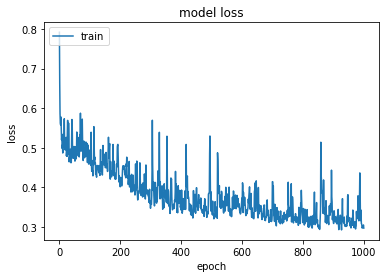

In [27]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanH_FullFeatures800Neurons.png')

In [28]:
#Extract feature importance data

from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

[]

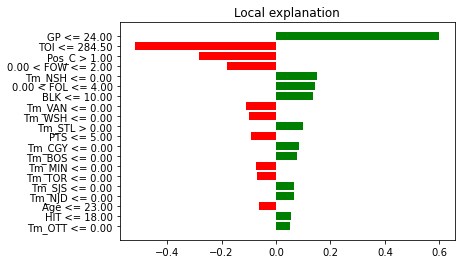

In [29]:
exp = explainer.explain_instance(X[15], nn.predict,
        num_features=20)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.plot()

In [30]:
features = []
features = exp.as_list()

In [31]:
features[42:]

[]

In [32]:
## Rerunning neural networks after droping the 18 least influencial features in order to determine if loss function improves



In [33]:
#Drop list of features
drop_list = ['S%','Tm_WPG','Tm_MTL','SH','Age','Tm_TOT','PS','Tm_PHI','Tm_OTT','Tm_PIT','Tm_ANA','GW','S','Pos_RW','Tm_CAR','EV','Tm_MIN','Pos_LW']

In [34]:
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])
data_df = data_df.drop(columns=drop_list)
data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)
y = data_df["Salary"]

X = data_df.drop(columns=['Salary'])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [36]:
X.shape

(769, 42)

In [37]:
number_inputs = 42
number_hidden_nodes = 800

In [38]:
nn2 = Sequential()
nn2.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn2.add(Dense(1, activation="tanh"))

# Compile model
nn2.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 800)               34400     
                                                                 
 dense_3 (Dense)             (None, 1)                 801       
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Fit the model
nn2_model = nn2.fit(X_train, y_train, epochs=1500)

Epoch 1/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.9858 - mean_squared_error: 0.9858
Epoch 2/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.8346 - mean_squared_error: 0.8346
Epoch 3/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7447 - mean_squared_error: 0.7447
Epoch 4/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6896 - mean_squared_error: 0.6896
Epoch 5/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6708 - mean_squared_error: 0.6708
Epoch 6/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6309 - mean_squared_error: 0.6309
Epoch 7/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6329 - mean_squared_error: 0.6329
Epoch 8/1500
18/18 [==============================] - 0s 1ms/step - loss: 0.6331 - mean_squared_error: 0.6331
Epoch 9/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6161 - mean_squared_error: 0.6161
Epoch 10/1

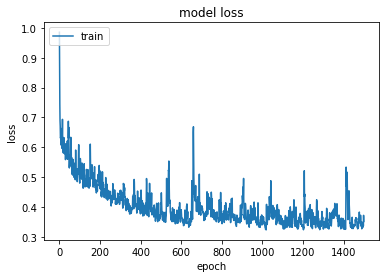

In [40]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn2_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanH_ReducedFeatures800Neurons.png')

In [41]:
#df_review['Delta'] = data_df['Predicted Salary'] - data_df['Cap Hit']
#df_review = df_review.sort_values('Delta')

Epoch 1/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9390 - mean_squared_error: 0.9390
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8092 - mean_squared_error: 0.8092
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7453 - mean_squared_error: 0.7453
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6971 - mean_squared_error: 0.6971
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7263 - mean_squared_error: 0.7263
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6407 - mean_squared_error: 0.6407
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6524 - mean_squared_error: 0.6524
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6778 - mean_squared_error: 0.6778
Epoch 9/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6332 - mean_squared_error: 0.6332
Epoch 10/1

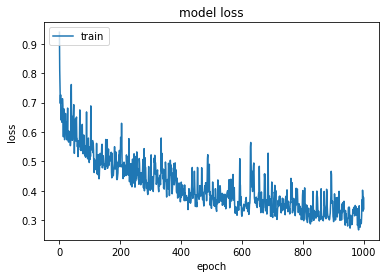

In [42]:
#Testing neural networks to see if greater accuracy could be acheived 

number_inputs = 42
number_hidden_nodes = 500

nn4 = Sequential()
nn4.add(Dense(units=900, input_dim=number_inputs, activation="tanh"))
nn4.add(Dense(1, activation="elu"))

# Compile model
nn4.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn4_model = nn4.fit(X_train, y_train, epochs=1000)

import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn4_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanHElu_ReducedFeatures900Neurons.png')

Epoch 1/1400
18/18 [==============================] - 0s 2ms/step - loss: 1.6073 - mean_squared_error: 1.6073
Epoch 2/1400
18/18 [==============================] - 0s 2ms/step - loss: 1.0036 - mean_squared_error: 1.0036
Epoch 3/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7966 - mean_squared_error: 0.7966
Epoch 4/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7969 - mean_squared_error: 0.7969
Epoch 5/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7411 - mean_squared_error: 0.7411
Epoch 6/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.6993 - mean_squared_error: 0.6993
Epoch 7/1400
18/18 [==============================] - 0s 1ms/step - loss: 0.7183 - mean_squared_error: 0.7183
Epoch 8/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7172 - mean_squared_error: 0.7172
Epoch 9/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.6957 - mean_squared_error: 0.6957
Epoch 10/1

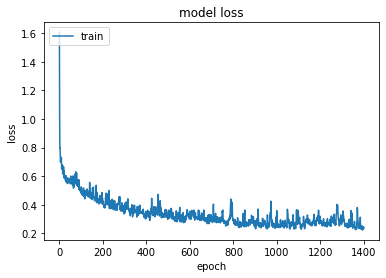

In [43]:
#Testing neural networks to see if greater accuracy could be acheived 

nn5 = Sequential()
nn5.add(Dense(units=300, input_dim=number_inputs, activation="tanh"))
nn5.add(Dense(1, activation="elu"))

# Compile model
nn5.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn5_model = nn5.fit(X_train, y_train, epochs=1400)

import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn5_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkEluTanh_ReducedFeatures300Neurons.png')

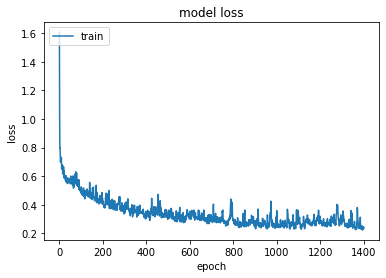

In [44]:
plt.plot(nn5_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkEluTanh_ReducedFeatures.png')


In [47]:
y_pred = nn5.predict(X)
data_df_initial["Y Scaled"] = y
data_df_initial["Y Pred"]= y_pred
data_df_initial["Predicted Salary"]= y_pred
df_review = data_df_initial


In [48]:
df_review['Delta'] = df_review['Predicted Salary'] - data_df['Salary']
df_review=df_review.sort_values("Delta")

In [49]:
#Sort by delta of actual and predicted salary to identify misvalued players
df_review.head(10)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
753,832,Drew Doughty,LAK,11000000.0,11000000.0,32.0,39.0,7.0,24.0,31.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.011935,-0.866143,-0.866143,-1.100000e+07
1,1,Jack Eichel,VEG,10000000.0,10000000.0,25.0,23.0,9.0,8.0,17.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.546240,-0.992847,-0.992847,-1.000000e+07
3,3,Jeff Skinner,BUF,10000000.0,9000000.0,29.0,68.0,28.0,22.0,50.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.546240,-0.880153,-0.880153,-1.000000e+07
2,2,Blake Wheeler,WPG,10000000.0,8250000.0,35.0,56.0,12.0,42.0,54.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.546240,-0.576544,-0.576544,-1.000000e+07
0,0,Mikko Rantanen,COL,10000000.0,9250000.0,25.0,66.0,35.0,47.0,82.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.546240,10.143053,10.143053,-9.999990e+06
4,4,Vladimir Tarasenko,STL,9500000.0,7500000.0,30.0,61.0,23.0,36.0,59.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.313392,-0.999847,-0.999847,-9.500001e+06
5,5,Oliver Ekman-Larsson,VAN,9240000.0,7260000.0,30.0,67.0,4.0,17.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.192311,-0.939272,-0.939272,-9.240001e+06
6,6,Justin Faulk,STL,9000000.0,6500000.0,29.0,62.0,9.0,25.0,34.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.080544,-0.999852,-0.999852,-9.000001e+06
8,8,Anders Lee,NYI,9000000.0,7000000.0,31.0,62.0,25.0,16.0,41.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.080544,-0.998985,-0.998985,-9.000001e+06
9,9,Kevin Hayes,PHI,9000000.0,7142857.0,29.0,35.0,8.0,16.0,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.080544,-0.997434,-0.997434,-9.000001e+06


In [50]:
df_review.tail(10)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
638,710,Lucas Carlsson,FLA,750000.0,750000.0,24.0,35.000000,3.000000,6.000000,9.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,9.865630,9.865630,-749990.134370
551,615,Jonathan Dahlen,SJS,750000.0,750000.0,24.0,53.000000,12.000000,10.000000,22.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.761443,10.114011,10.114011,-749989.885989
567,633,Roman Josi,NSH,750000.0,9059000.0,31.0,66.000000,18.000000,63.000000,81.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,10.239494,10.239494,-749989.760506
637,709,Petteri Lindbohm,FLA,750000.0,750000.0,28.0,5.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,10.264133,10.264133,-749989.735867
724,802,Chase Priskie,FLA,750000.0,750000.0,25.0,4.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,10.283569,10.283569,-749989.716431
682,757,Anthony Greco,NYR,737500.0,737500.0,28.0,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,-0.767265,4.736078,4.736078,-737495.263922
686,761,Austin Czarnik,NYI,725000.0,725000.0,29.0,11.333333,1.333333,3.333333,4.666667,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.773086,-0.999898,-0.999898,-725000.999898
741,820,Daniel Sprong,SEA,725000.0,725000.0,24.0,35.333333,7.333333,4.000000,11.333333,...,0.0,0.333333,0.0,0.0,0.0,1.0,-0.773086,-0.981645,-0.981645,-725000.981645
656,730,Andrew Cogliano,COL,500000.0,500000.0,34.0,41.333333,2.666667,8.000000,10.666667,...,0.0,0.000000,0.0,0.0,1.0,0.0,-0.877867,6.614564,6.614564,-499993.385436
657,731,Derick Brassard,EDM,412500.0,412500.0,34.0,24.666667,5.333333,6.666667,12.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.918616,0.239956,0.239956,-412499.760044


In [51]:
df_review.value_counts('Predicted Salary')

Predicted Salary
-1.000000     3
-0.999998     2
 1.588855     1
 1.361290     1
 1.364812     1
             ..
-0.947173     1
-0.945861     1
-0.945575     1
-0.944497     1
 12.776760    1
Length: 766, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Predicted Salary'>

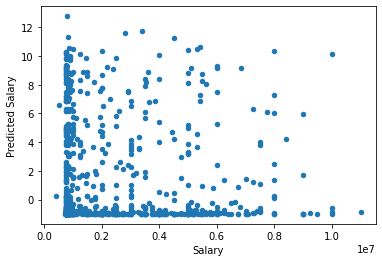

In [52]:
df_review.plot.scatter(x='Salary', y='Predicted Salary')

# Conclusions

We trained a variety of neural network models attempting to minimize the loss function. We varied the number of neurons and layers, and tested different activation functions (Tanh,Elu, Selu, Relu, Sigmoid, Softmax).

Findings:
- Additional layers and neurons will not necessarily lead to better loss functions. Increasing number of neurons will initially decrease the loss function, before pushing it up. Best approach is a balanced approach. Our best model had a 7.1 neurons per input feature
- Of the activation functions, only Sigmoid, Tanh and Elu gave decreasing loss functions with values < 1
- In terms of improving activation functions, performance went Sigmoid -> TanH -> Elu
- Through testing we noticed Elu worked best as the activation function of the output layer, and Tanh for the one hidden layer we are using

In [53]:
df_review.tail(25)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
565,631,Matt Luff,NSH,750000.0,750000.0,24.0,16.000000,3.000000,3.000000,6.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,-0.761443,8.440387,8.440387,-749991.559613
731,810,Cole Smith,NSH,750000.0,750000.0,26.0,8.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.0,0.0,-0.761443,8.466306,8.466306,-749991.533694
708,784,Brett Seney,TOR,750000.0,750000.0,25.0,2.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.0,0.0,-0.761443,8.687757,8.687757,-749991.312243
640,712,Mitch Marner,TOR,750000.0,10903000.0,24.0,59.000000,28.000000,53.000000,81.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,-0.761443,8.711881,8.711881,-749991.288119
548,612,Jack Johnson,COL,750000.0,750000.0,35.0,65.000000,1.000000,7.000000,8.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,8.767447,8.767447,-749991.232553
649,723,Alexander Chmelevski,SJS,750000.0,778333.0,22.0,6.000000,0.000000,3.000000,3.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.761443,8.803656,8.803656,-749991.196344
634,706,Joe Thornton,FLA,750000.0,750000.0,42.0,30.000000,5.000000,4.000000,9.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.761443,8.914253,8.914253,-749991.085747
636,708,Brandon Montour,FLA,750000.0,3500000.0,27.0,68.000000,9.000000,19.000000,28.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,9.029938,9.029938,-749990.970062
549,613,Scott Reedy,SJS,750000.0,842500.0,22.0,21.000000,2.000000,1.000000,3.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.761443,9.041397,9.041397,-749990.958603
717,795,Carl Dahlstrom,TOR,750000.0,750000.0,27.0,2.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,9.108487,9.108487,-749990.891513


In [54]:
#df.loc[df['name'] == 'joe']
df_review.loc[df_review['Player'] =='Seth Jones']

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
74,92,Seth Jones,CHI,5400000.0,5400000.0,27.0,66.0,5.0,42.0,47.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.40404,6.874268,6.874268,-5.399993e+06


In [55]:
df = df_review.reset_index()

In [56]:
df.head(25)

,index,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
0,753,832,Drew Doughty,LAK,11000000.0,11000000.0,32.0,39.0,7.0,24.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.011935,-0.866143,-0.866143,-1.100000e+07
1,1,1,Jack Eichel,VEG,10000000.0,10000000.0,25.0,23.0,9.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.546240,-0.992847,-0.992847,-1.000000e+07
2,3,3,Jeff Skinner,BUF,10000000.0,9000000.0,29.0,68.0,28.0,22.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.546240,-0.880153,-0.880153,-1.000000e+07
3,2,2,Blake Wheeler,WPG,10000000.0,8250000.0,35.0,56.0,12.0,42.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.546240,-0.576544,-0.576544,-1.000000e+07
4,0,0,Mikko Rantanen,COL,10000000.0,9250000.0,25.0,66.0,35.0,47.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.546240,10.143053,10.143053,-9.999990e+06
5,4,4,Vladimir Tarasenko,STL,9500000.0,7500000.0,30.0,61.0,23.0,36.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.313392,-0.999847,-0.999847,-9.500001e+06
6,5,5,Oliver Ekman-Larsson,VAN,9240000.0,7260000.0,30.0,67.0,4.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.192311,-0.939272,-0.939272,-9.240001e+06
7,6,6,Justin Faulk,STL,9000000.0,6500000.0,29.0,62.0,9.0,25.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.080544,-0.999852,-0.999852,-9.000001e+06
8,8,8,Anders Lee,NYI,9000000.0,7000000.0,31.0,62.0,25.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.080544,-0.998985,-0.998985,-9.000001e+06
9,9,9,Kevin Hayes,PHI,9000000.0,7142857.0,29.0,35.0,8.0,16.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.080544,-0.997434,-0.997434,-9.000001e+06


In [57]:
df.tail(25)

,index,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
744,565,631,Matt Luff,NSH,750000.0,750000.0,24.0,16.000000,3.000000,3.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,-0.761443,8.440387,8.440387,-749991.559613
745,731,810,Cole Smith,NSH,750000.0,750000.0,26.0,8.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.0,0.0,-0.761443,8.466306,8.466306,-749991.533694
746,708,784,Brett Seney,TOR,750000.0,750000.0,25.0,2.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.0,0.0,-0.761443,8.687757,8.687757,-749991.312243
747,640,712,Mitch Marner,TOR,750000.0,10903000.0,24.0,59.000000,28.000000,53.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,-0.761443,8.711881,8.711881,-749991.288119
748,548,612,Jack Johnson,COL,750000.0,750000.0,35.0,65.000000,1.000000,7.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,8.767447,8.767447,-749991.232553
749,649,723,Alexander Chmelevski,SJS,750000.0,778333.0,22.0,6.000000,0.000000,3.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.761443,8.803656,8.803656,-749991.196344
750,634,706,Joe Thornton,FLA,750000.0,750000.0,42.0,30.000000,5.000000,4.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.761443,8.914253,8.914253,-749991.085747
751,636,708,Brandon Montour,FLA,750000.0,3500000.0,27.0,68.000000,9.000000,19.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,9.029938,9.029938,-749990.970062
752,549,613,Scott Reedy,SJS,750000.0,842500.0,22.0,21.000000,2.000000,1.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,-0.761443,9.041397,9.041397,-749990.958603
753,717,795,Carl Dahlstrom,TOR,750000.0,750000.0,27.0,2.000000,0.000000,1.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,-0.761443,9.108487,9.108487,-749990.891513


In [58]:
df.loc[df['Player'] =='Seth Jones']

,index,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
85,74,92,Seth Jones,CHI,5400000.0,5400000.0,27.0,66.0,5.0,42.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.40404,6.874268,6.874268,-5.399993e+06


In [59]:
df.loc[df['Player'] =='Connor McDavid']

,index,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,...,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_LW,Pos_RW,Y Scaled,Y Pred,Predicted Salary,Delta
416,378,429,Connor McDavid,EDM,1000000.0,12500000.0,25.0,69.0,40.0,65.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.645019,1.556903,1.556903,-999998.443097
